In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("../../data/cleaned_dataset.csv")
df_encoded = pd.read_csv("../../data/encoded_dataset.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100244 entries, 0 to 100243
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      100244 non-null  object
 1   gender                    100244 non-null  object
 2   age                       100244 non-null  object
 3   admission_type_id         100244 non-null  int64 
 4   discharge_disposition_id  100244 non-null  int64 
 5   admission_source_id       100244 non-null  int64 
 6   time_in_hospital          100244 non-null  int64 
 7   medical_specialty         100244 non-null  object
 8   num_lab_procedures        100244 non-null  int64 
 9   num_procedures            100244 non-null  int64 
 10  num_medications           100244 non-null  int64 
 11  number_outpatient         100244 non-null  int64 
 12  number_emergency          100244 non-null  int64 
 13  number_inpatient          100244 non-null  int64 
 14  diag

In [20]:
df.sample(20)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
85076,Caucasian,Female,[70-80),1,3,7,3,Emergency/Trauma,1,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
3037,Caucasian,Male,[60-70),1,1,7,1,Cardiology,36,6,...,No,No,No,No,No,No,No,No,Yes,NO
39408,AfricanAmerican,Male,[50-60),3,1,7,2,Emergency/Trauma,9,3,...,No,No,No,No,No,No,No,Ch,Yes,NO
22390,Caucasian,Male,[70-80),3,6,4,5,PhysicalMedicineandRehabilitation,41,0,...,No,No,No,No,No,No,No,No,Yes,NO
10589,Other,Female,[70-80),3,1,1,2,InternalMedicine,37,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
78141,Caucasian,Female,[60-70),1,1,7,4,Unknown,57,0,...,No,No,No,No,No,No,No,Ch,Yes,NO
83385,AfricanAmerican,Female,[60-70),2,1,7,7,Emergency/Trauma,85,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
29651,Caucasian,Male,[70-80),5,3,17,11,Unknown,18,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
89395,Caucasian,Male,[60-70),1,3,7,9,Unknown,77,0,...,No,No,No,No,No,No,No,Ch,Yes,>30
19188,Caucasian,Male,[70-80),2,3,17,3,Family/GeneralPractice,25,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30


In [21]:
df.isnull().sum()
# data is cleaned

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide   

In [22]:
df.apply(pd.Series.unique)

race                        [Caucasian, AfricanAmerican, Other, Asian, His...
gender                                        [Female, Male, Unknown/Invalid]
age                         [[10-20), [20-30), [30-40), [40-50), [50-60), ...
admission_type_id                                    [1, 2, 3, 6, 4, 5, 8, 7]
discharge_disposition_id    [1, 3, 6, 2, 5, 11, 7, 25, 10, 4, 14, 18, 8, 1...
admission_source_id         [7, 2, 4, 1, 5, 6, 20, 3, 17, 8, 9, 14, 10, 22...
time_in_hospital              [3, 2, 1, 4, 5, 13, 12, 9, 7, 10, 6, 11, 8, 14]
medical_specialty           [Unknown, InternalMedicine, Family/GeneralPrac...
num_lab_procedures          [59, 11, 44, 51, 31, 70, 73, 68, 33, 47, 62, 6...
num_procedures                                          [0, 5, 1, 6, 2, 3, 4]
num_medications             [18, 13, 16, 8, 21, 12, 28, 17, 11, 15, 31, 2,...
number_outpatient           [0, 2, 1, 5, 7, 9, 3, 8, 4, 12, 11, 6, 20, 15,...
number_emergency            [0, 1, 4, 2, 3, 9, 7, 5, 6, 8, 22, 2

In [23]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")


Value counts for race:
race
Caucasian          75079
AfricanAmerican    18881
Other               3675
Hispanic            1984
Asian                625
Name: count, dtype: int64


Value counts for gender:
gender
Female             53922
Male               46319
Unknown/Invalid        3
Name: count, dtype: int64


Value counts for age:
age
[70-80)     25898
[60-70)     22288
[80-90)     17090
[50-60)     17044
[40-50)      9474
[30-40)      3616
[90-100)     2785
[20-30)      1515
[10-20)       469
[0-10)         65
Name: count, dtype: int64


Value counts for medical_specialty:
medical_specialty
Unknown                   49482
InternalMedicine          14384
Emergency/Trauma           7496
Family/GeneralPractice     7299
Cardiology                 5321
                          ...  
Proctology                    1
Speech                        1
SportsMedicine                1
Perinatology                  1
Neurophysiology               1
Name: count, Length: 73, dtype: int64


Valu

In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100244 entries, 0 to 100243
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   admission_type_id         100244 non-null  int64  
 1   discharge_disposition_id  100244 non-null  int64  
 2   admission_source_id       100244 non-null  int64  
 3   time_in_hospital          100244 non-null  int64  
 4   medical_specialty         100244 non-null  int64  
 5   num_lab_procedures        100244 non-null  int64  
 6   num_procedures            100244 non-null  int64  
 7   num_medications           100244 non-null  int64  
 8   number_outpatient         100244 non-null  int64  
 9   number_emergency          100244 non-null  int64  
 10  number_inpatient          100244 non-null  int64  
 11  diag_1                    100244 non-null  int64  
 12  diag_2                    100244 non-null  int64  
 13  diag_3                    100244 non-null  i

In [25]:
df_encoded.sample(20)

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),gender_Female,gender_Male,gender_other
54334,3,1,1,2,3,56,4,9,0,0,...,False,False,True,False,False,False,False,True,False,False
31971,3,1,1,1,0,42,0,9,0,4,...,False,False,True,False,False,False,False,True,False,False
44700,1,6,7,6,0,47,1,13,0,0,...,False,False,False,True,False,False,False,False,True,False
95900,6,1,17,4,3,64,3,26,0,0,...,False,False,True,False,False,False,False,False,True,False
73009,1,1,7,2,0,45,1,8,0,0,...,False,False,False,False,False,True,False,False,True,False
28605,1,3,5,5,4,75,1,18,0,0,...,False,False,False,False,False,False,True,True,False,False
10844,1,3,7,7,11,68,1,16,0,0,...,False,False,False,False,False,True,False,True,False,False
41217,1,1,7,2,1,56,0,11,0,0,...,False,False,False,True,False,False,False,True,False,False
18698,1,1,7,2,11,61,0,14,0,0,...,False,False,False,True,False,False,False,False,True,False
59729,3,1,1,8,51,41,5,19,4,1,...,False,False,True,False,False,False,False,True,False,False


In [26]:
df_encoded.apply(pd.Series.unique)

admission_type_id                                    [1, 2, 3, 6, 4, 5, 8, 7]
discharge_disposition_id    [1, 3, 6, 2, 5, 11, 7, 25, 10, 4, 14, 18, 8, 1...
admission_source_id         [7, 2, 4, 1, 5, 6, 20, 3, 17, 8, 9, 14, 10, 22...
time_in_hospital              [3, 2, 1, 4, 5, 13, 12, 9, 7, 10, 6, 11, 8, 14]
medical_specialty           [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
num_lab_procedures          [59, 11, 44, 51, 31, 70, 73, 68, 33, 47, 62, 6...
num_procedures                                          [0, 5, 1, 6, 2, 3, 4]
num_medications             [18, 13, 16, 8, 21, 12, 28, 17, 11, 15, 31, 2,...
number_outpatient           [0, 2, 1, 5, 7, 9, 3, 8, 4, 12, 11, 6, 20, 15,...
number_emergency            [0, 1, 4, 2, 3, 9, 7, 5, 6, 8, 22, 25, 10, 13,...
number_inpatient            [0, 1, 2, 3, 6, 5, 4, 7, 8, 9, 15, 10, 11, 14,...
diag_1                      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
diag_2                      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1

In [27]:
corr_matrix = df_encoded.corr()
corr_matrix

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),gender_Female,gender_Male,gender_other
admission_type_id,1.000000,0.081336,0.107310,-0.012292,0.125438,-0.142544,0.130534,0.079980,0.025903,-0.019428,...,-0.001973,-0.006008,0.007832,0.016618,0.021178,-0.029280,-0.022574,-0.014277,0.014292,-0.001348
discharge_disposition_id,0.081336,1.000000,0.018009,0.162757,-0.022733,0.022923,0.014618,0.107725,-0.009212,-0.025000,...,-0.043196,-0.046971,-0.041243,-0.014897,0.042196,0.065163,0.036814,0.020838,-0.020886,0.004424
admission_source_id,0.107310,0.018009,1.000000,-0.007663,-0.169792,0.048046,-0.135870,-0.055491,0.026576,0.059377,...,-0.003125,0.004474,-0.024619,-0.045821,0.005676,0.052852,0.037328,0.004455,-0.004444,-0.001024
time_in_hospital,-0.012292,0.162757,-0.007663,1.000000,-0.000402,0.319349,0.189236,0.463838,-0.010363,-0.010419,...,-0.036480,-0.038312,-0.042108,-0.004708,0.035364,0.059811,0.019106,0.029499,-0.029477,-0.001988
medical_specialty,0.125438,-0.022733,-0.169792,-0.000402,1.000000,-0.110508,0.113629,0.027596,-0.021674,0.003118,...,0.002879,0.004865,0.008183,0.019726,-0.004655,-0.034019,-0.023102,-0.015923,0.015942,-0.001766
num_lab_procedures,-0.142544,0.022923,0.048046,0.319349,-0.110508,1.000000,0.058242,0.268933,-0.007708,-0.002237,...,-0.000115,-0.003936,-0.010934,-0.014003,0.000815,0.021928,0.013265,0.002423,-0.002395,-0.002549
num_procedures,0.130534,0.014618,-0.135870,0.189236,0.113629,0.058242,1.000000,0.383108,-0.026405,-0.038567,...,-0.023251,0.001265,0.056574,0.070658,0.010291,-0.086628,-0.067177,-0.060446,0.060400,0.004209
num_medications,0.079980,0.107725,-0.055491,0.463838,0.027596,0.268933,0.383108,1.000000,0.043228,0.012259,...,-0.042666,-0.024470,0.029989,0.070094,0.023271,-0.042931,-0.047594,0.021450,-0.021451,0.000145
number_outpatient,0.025903,-0.009212,0.026576,-0.010363,-0.021674,-0.007708,-0.026405,0.043228,1.000000,0.091533,...,-0.011387,-0.010215,-0.015193,0.007087,0.010167,0.016468,-0.013034,0.011319,-0.011302,-0.001600
number_emergency,-0.019428,-0.025000,0.059377,-0.010419,0.003118,-0.002237,-0.038567,0.012259,0.091533,1.000000,...,0.061854,0.056639,0.012118,-0.020472,-0.042577,-0.026289,-0.012240,0.020463,-0.020451,-0.001166


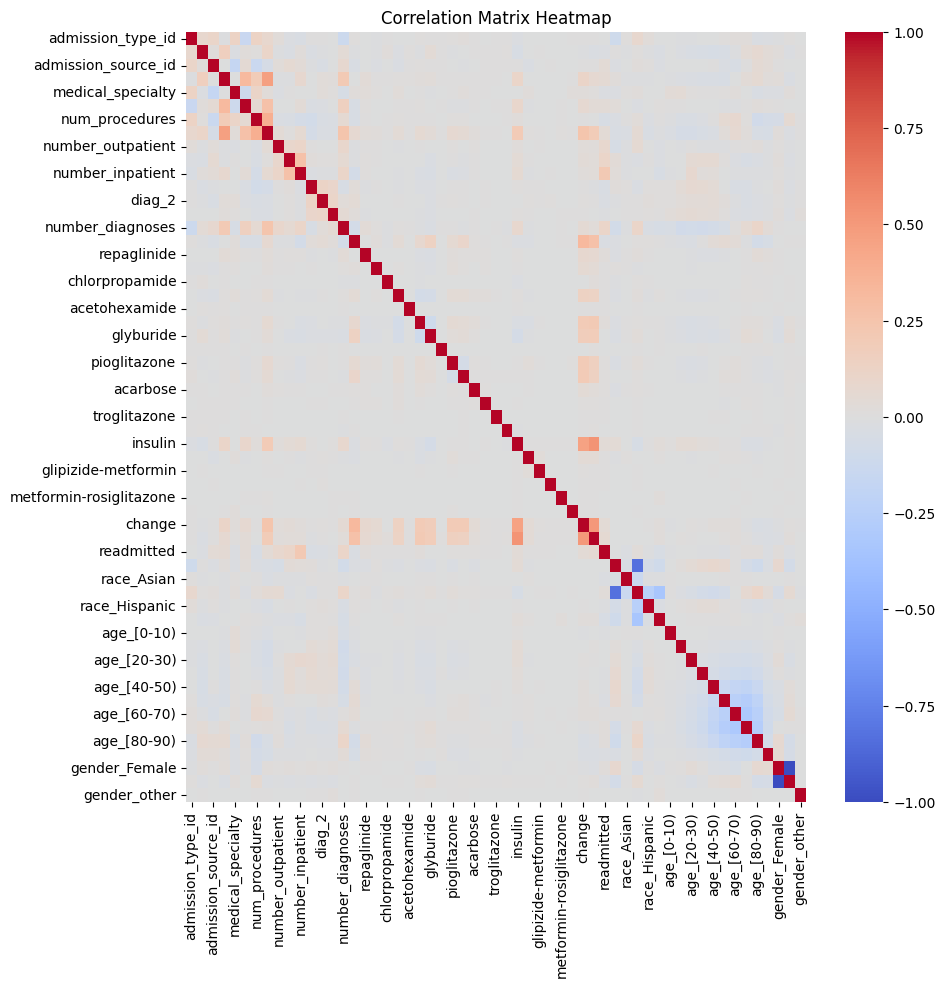

In [28]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [29]:
corr_target = df_encoded.corr()["readmitted"]
corr_target

admission_type_id          -0.004892
discharge_disposition_id   -0.016253
admission_source_id         0.039624
time_in_hospital            0.048961
medical_specialty          -0.019295
num_lab_procedures          0.037806
num_procedures             -0.046852
num_medications             0.043180
number_outpatient           0.081238
number_emergency            0.102183
number_inpatient            0.215636
diag_1                     -0.036125
diag_2                     -0.029641
diag_3                     -0.014707
number_diagnoses            0.107205
metformin                  -0.028572
repaglinide                 0.021126
nateglinide                 0.004201
chlorpropamide              0.000980
glimepiride                 0.003325
acetohexamide               0.003401
glipizide                   0.018510
glyburide                  -0.004901
tolbutamide                -0.003502
pioglitazone                0.011601
rosiglitazone               0.010986
acarbose                    0.014336
m

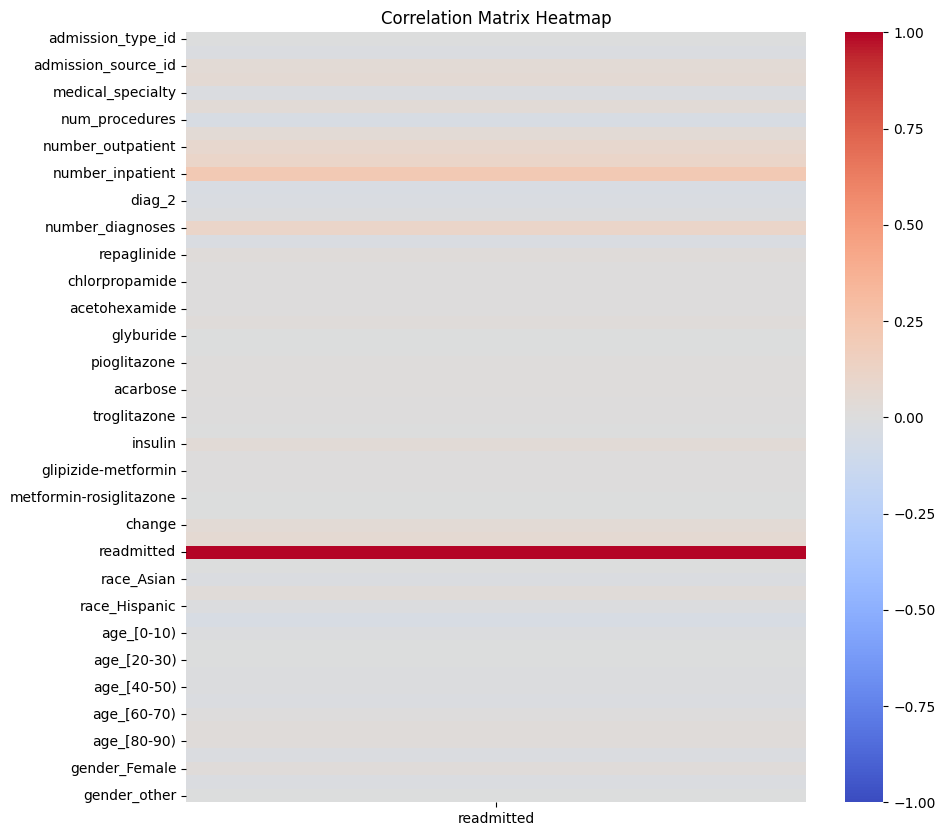

In [30]:
plt.figure(figsize=(10, 10)) 
sns.heatmap(corr_target.to_frame(), cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

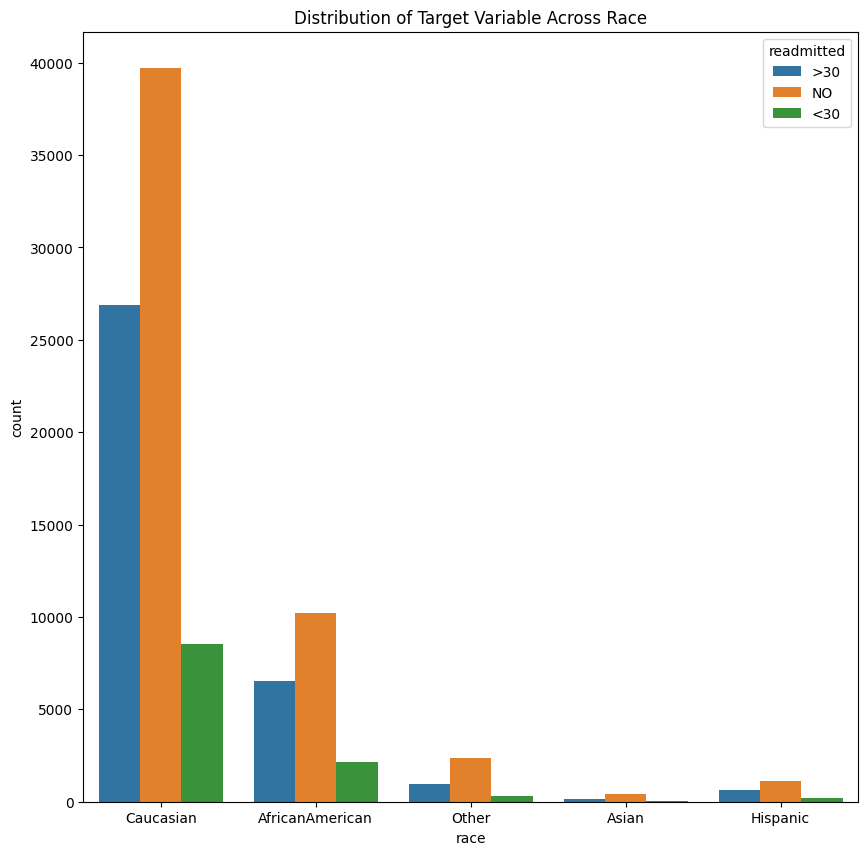

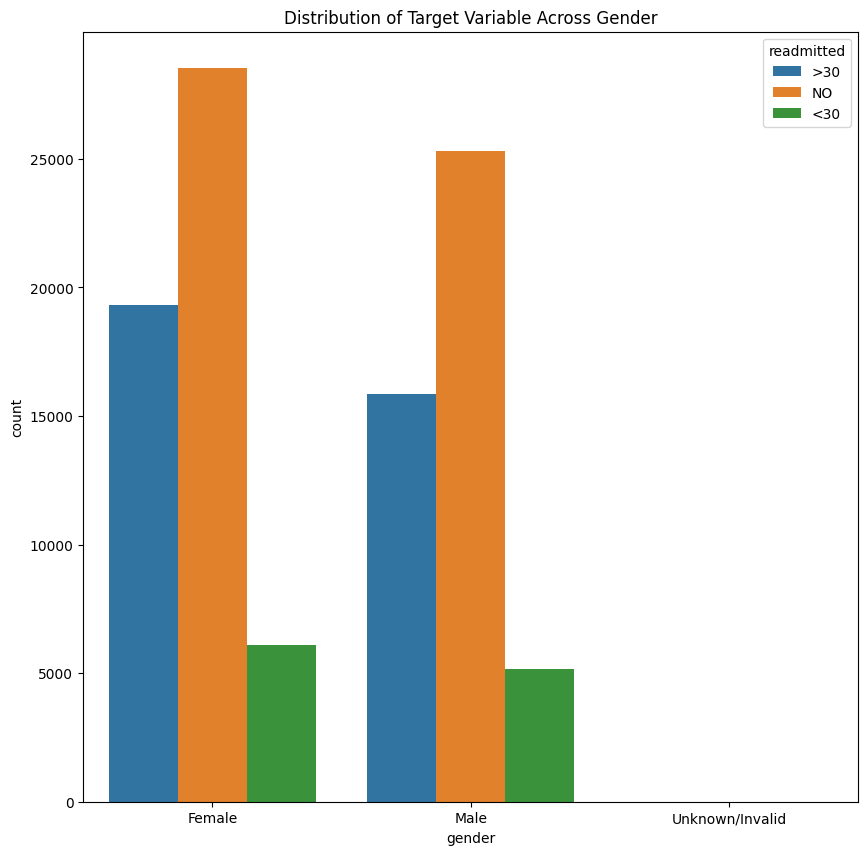

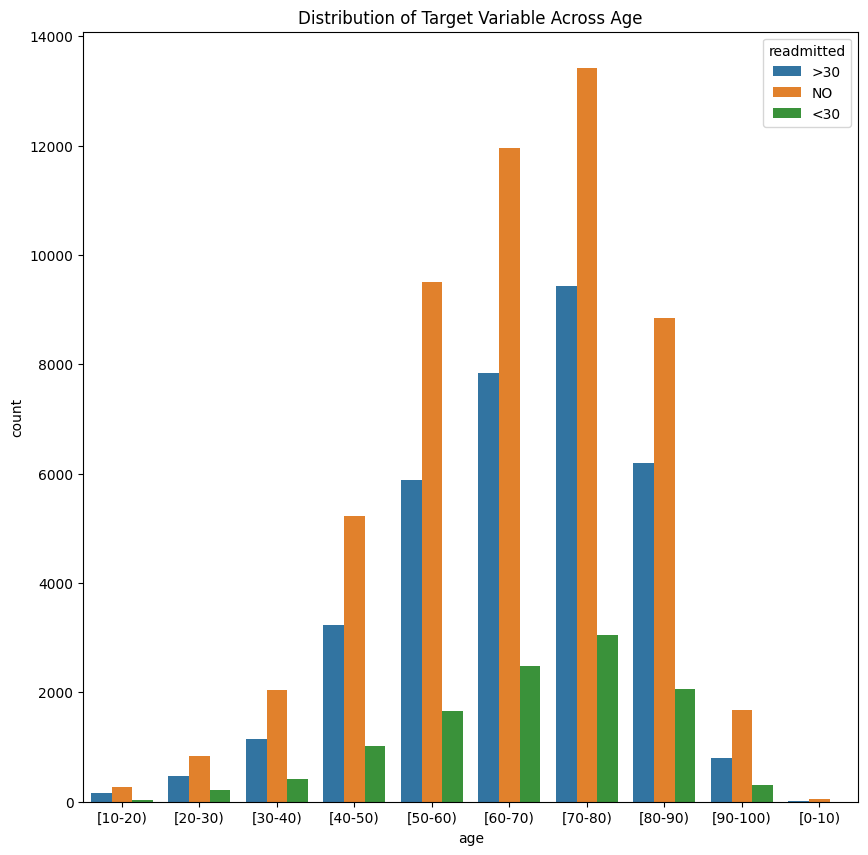

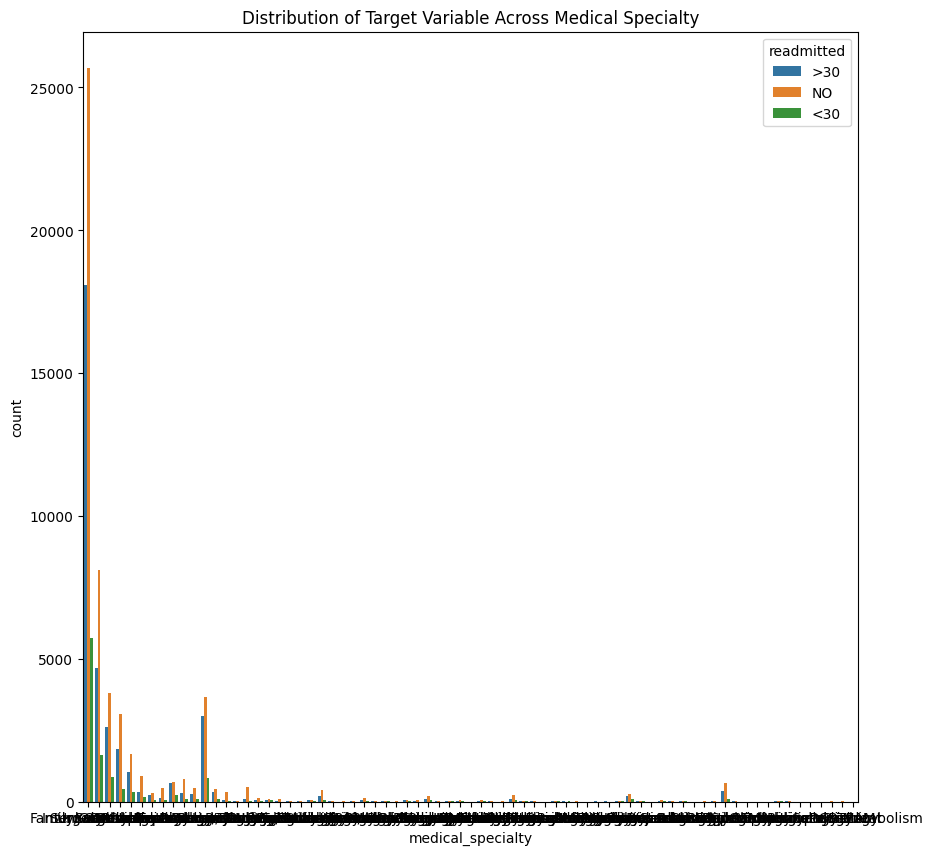

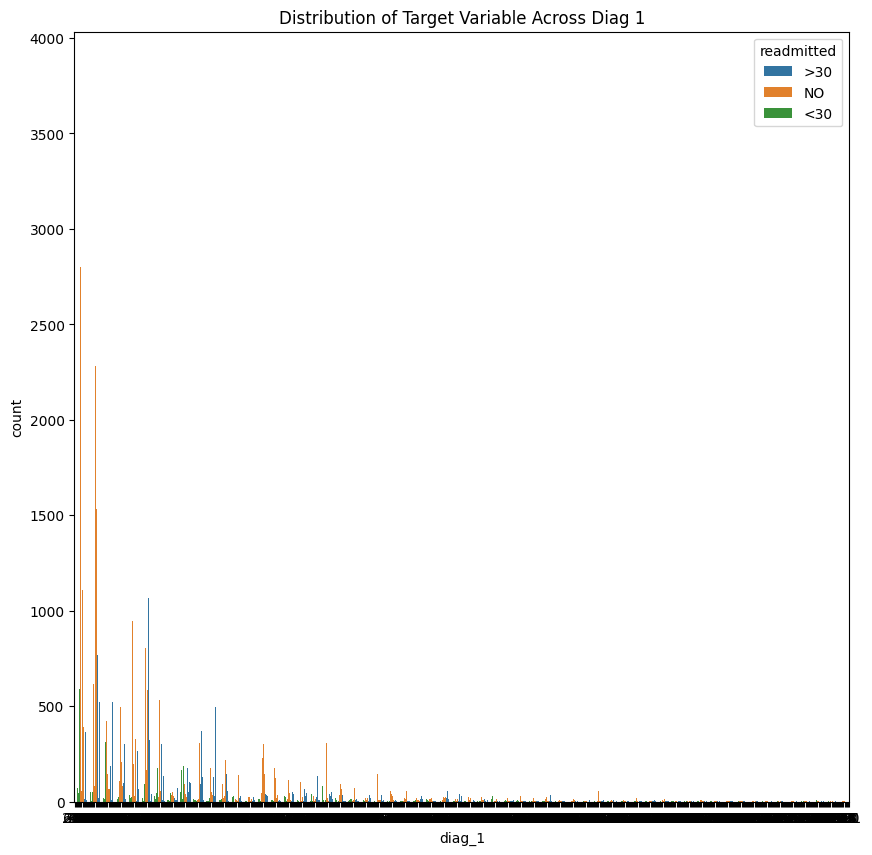

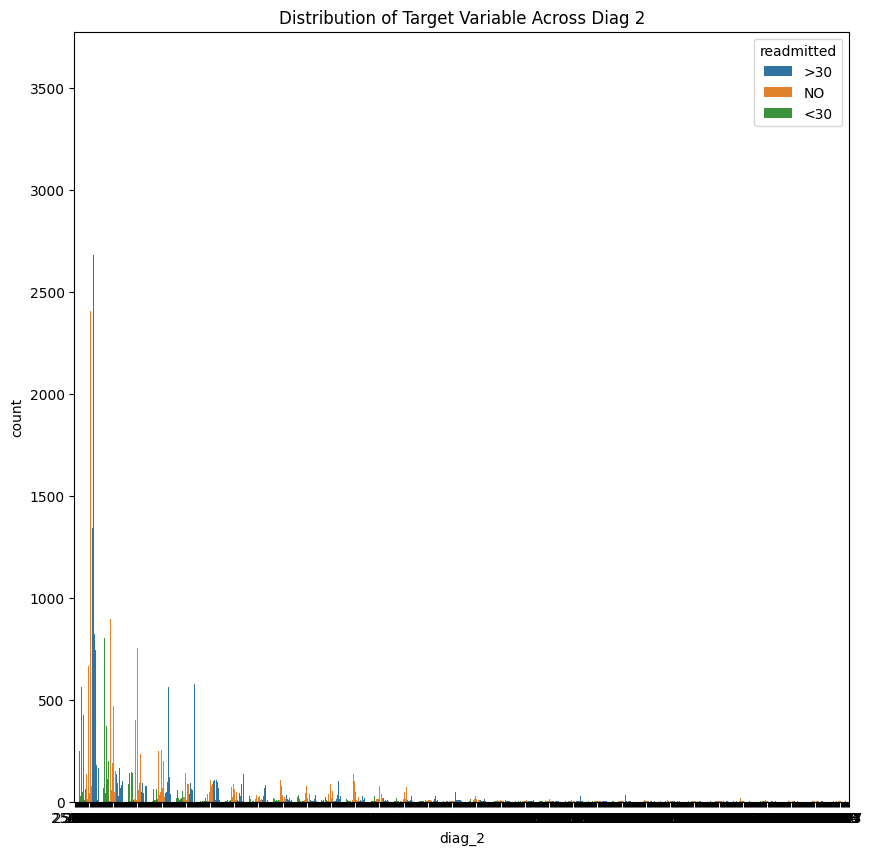

In [31]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(10, 10))
    sns.countplot(x=col, hue="readmitted", data=df)
    col_name = col.title().replace("_"," ")
    plt.title(f"Distribution of Target Variable Across {col_name}")
    plt.show()

In [ ]:
sns.countplot(df["readmitted"])

In [ ]:
sns.boxplot(df["time_in_hospital"])